# Reproduce the figures in the paper

In [3]:
import random
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import time
import datetime as dt

from scipy.stats import norm, skewnorm

In [4]:
def rms(x, axis=None):
    if axis is not None:
        return np.sqrt(np.sum(x**2, axis=axis) / x.shape[axis])
    return np.sqrt(np.sum(x**2) / x.size)
normal_pdf = lambda mu, sigma, x: np.exp(-(x - mu)**2 / (2 * sigma**2))/(np.sqrt(2 * np.pi * sigma**2))

# Global Energy Forecasting Competition (GEFCom) 2017
DPK improved upon the vanilla benchmark forecast by 15.4% on average. Running all 108 forecasts to replicate this result can take days on a laptop cpu, so we provided the relative improvement for each of the 108 forecasts (in the appendix of the paper) so a sample of them can be replicated.

To replicate the results for a particular month (on all 9 zones), open the `gefcom_comparison.ipynb` notebook, define which month you would like to replicate results for, and run the entire notebook. If you do this for all 12 months, you can replicate the figures by running the cells below.

The vanilla benchmark is a simple ensemble of MLR models as described in [Tao Hong] (doi.org/10.1016/j.ijforecast.2019.02.006) that derive uncertainty from various future-date temperature scenarios. It can be found in `vanilla_benchmark.py`.

In [406]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [701]:
zones = ['ISONE CA', 'ME', 'RI', 'VT', 'CT', 'NH', 'SEMASS', 'WCMASS', 'NEMASSBOST']

test_z_scores_dict = dict()
test_bias = pd.DataFrame(columns=zone_names, index=months, dtype=np.float64)
test_rms = pd.DataFrame(columns=zone_names, index=months, dtype=np.float64)
test_z_scores = []

z_scores_dict = dict()
train_bias = pd.DataFrame(columns=zone_names, index=months, dtype=np.float64)
train_rms = pd.DataFrame(columns=zone_names, index=months, dtype=np.float64)
z_scores = []

relative_perfs = pd.DataFrame()
relative = []

folder = ".\\experiments\\vanilla_comp\\"
for fname in os.listdir(folder):
    if fname.endswith("relative_perfs.npy"):
        month = fname[19:22]
        tmp = np.load(os.path.join(folder, fname))
        relative_perfs[month] = tmp
        relative.extend(relative_perfs[month])
    if fname.endswith("test_z_scores.npy"):
        month = fname[19:22]
        zs = np.load(os.path.join(folder, fname))
        test_z_scores_dict[month] = zs
        test_bias.loc[month] = zs.mean(axis=1)[:, 0]
        test_rms.loc[month] = rms(zs, axis=1)[:, 0]
        test_z_scores.extend(zs.tolist())
    elif fname.endswith("z_scores.npy"):
        month = fname[19:22]
        zs = np.load(os.path.join(folder, fname))
        train_bias.loc[month] = zs.mean(axis=1)[:, 0]
        train_rms.loc[month] = rms(zs, axis=1)[:, 0]
        z_scores_dict[month] = zs
        z_scores.extend(zs.tolist())
zone_names = ['ISONE CA', 'ME', 'RI', 'VT', 'CT', 'NH', 'SEMASS', 'WCMASS', 'NEMASSBOST']
relative_perfs.index = zone_names
relative_perfs = relative_perfs.T
relative_perfs = relative_perfs.loc[months]

In [702]:
relative_perfs["avg"] = relative_perfs.mean(axis=1)
relative_perfs

,ISONE CA,ME,RI,VT,CT,NH,SEMASS,WCMASS,NEMASSBOST,avg
Jan,5.822288,-8.664058,11.688612,12.483537,3.671150,8.409701,18.541819,5.700768,18.177769,8.425732
Feb,1.267584,-16.877809,20.165660,16.594659,13.996692,-7.901946,11.153686,9.601977,13.230541,6.803449
Mar,30.943332,26.869192,34.634260,36.382601,32.964482,34.997652,29.390384,22.892986,0.182339,27.695248
Apr,20.066409,-43.609571,24.690598,41.066698,22.330931,25.337841,31.931187,31.063095,21.681848,19.395448
May,20.579136,8.645902,12.878658,44.515391,11.222106,22.426953,24.675967,19.052929,19.871974,20.429891
Jun,17.358580,19.008196,22.837945,23.681359,23.661812,19.321160,14.520881,14.550569,6.990514,17.992335
Jul,23.033844,36.238045,19.618968,29.348120,30.907692,28.357996,16.843890,15.440025,16.618844,24.045269
Aug,15.571513,33.741951,19.352477,24.764437,24.706669,24.022076,23.355411,1.268775,12.845849,19.958795
Sep,-0.613025,-6.162494,6.660775,17.940334,2.329764,4.427154,1.713599,1.023125,2.593878,3.323679
Oct,13.272820,11.893735,7.487998,30.632169,13.170353,22.427638,23.645243,20.248682,16.313423,17.676896


In [478]:
train_bias.mean().mean(), train_rms.mean().mean(), test_bias.mean().mean(), test_rms.mean().mean()

(-0.0032748735794872383,
 1.0148410456206465,
 -0.18410019839847325,
 1.194697915674581)

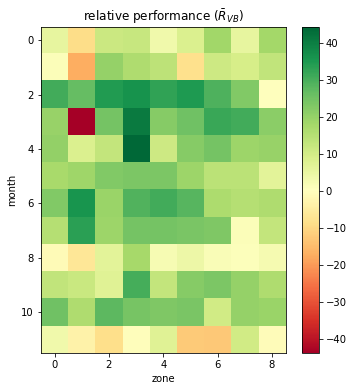

In [689]:
plt.figure(figsize=(6,6))
plt.imshow(relative_perfs.values, cmap="RdYlGn")
plt.ylabel("month")
plt.xlabel("zone")
plt.title("relative performance ($\\bar R_{VB}$)")
plt.colorbar()

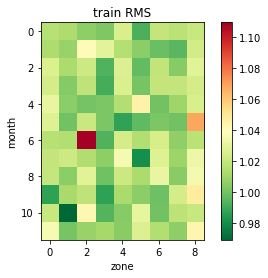

In [691]:
plt.imshow(train_rms.values, cmap="RdYlGn_r")
plt.ylabel("month")
plt.xlabel("zone")
plt.title("train RMS")
plt.colorbar()

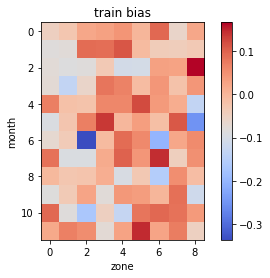

In [684]:
plt.imshow(train_bias.values, cmap="coolwarm")
plt.ylabel("month")
plt.xlabel("zone")
plt.title("train bias")
plt.colorbar()

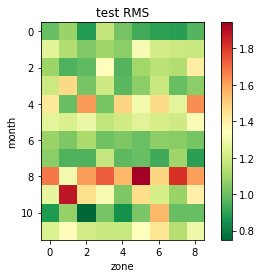

In [690]:
plt.imshow(test_rms.values, cmap="RdYlGn_r")
plt.ylabel("month")
plt.xlabel("zone")
plt.title("test RMS")
plt.colorbar()

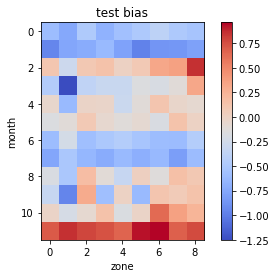

In [685]:
plt.imshow(test_bias.values, cmap="coolwarm")
plt.ylabel("month")
plt.xlabel("zone")
plt.title("test bias")
plt.colorbar()

# Periodic trends in uncertainty
Replicate the figure showing periodic patterns in uncertainty.

In [661]:
import json
month_name = "Dec"
zone_name = "VT"

with open("GEFCom2017\\GEFCom2017-Qual\\GEFCom2017QualAll.json") as f:
    all_data = json.loads(f.read())
    
data = np.transpose(np.array([all_data[zone_name]["DEMAND"]], dtype=np.float64))
dates = np.array(list(map(pd.Timestamp, all_data["ISONE CA"]["Date"])))
zones = list(all_data.keys())
print(zones)

month_idx = months.index(month_name)
print("Testing on month", months[month_idx])
test_start_date = pd.Timestamp(f"2017-{month_idx + 1}-01 00:00:00")
test_start = np.argwhere(dates == test_start_date)[0, 0]
test_length = 31 * 24

delay_delta = pd.Timedelta(days=52)
delay = delay_delta.days * 24
train_end_date = test_start_date - delay_delta
train_start_date = train_end_date.replace(year=train_end_date.year - 11)
train_start = np.argwhere(dates == train_start_date)[0, 0]
train_length_delta = train_end_date - train_start_date
train_through = train_length_delta.days * 24
pre_length_delta = train_length_delta * 0.5 # the length of time at the beginning of the trianing period to hide from mu
pre_length = pre_length_delta.days * 24

print("MONTH:", month_name)
data = np.array([all_data[zone_name]["DEMAND"]], dtype=np.float64).T

# rescale data
x_original = data
mean = np.mean(data, axis=0)
rnge = np.max(data, axis=0) - np.min(data, axis=0)
data = (data - np.matlib.repmat(mean, data.shape[0], 1)) / np.matlib.repmat(rnge, data.shape[0], 1)
print("data", data.shape)
predict_through = train_through + delay + test_length
x = data[train_start:][:predict_through]

['ISONE CA', 'ME', 'RI', 'VT', 'CT', 'NH', 'SEMASS', 'WCMASS', 'NEMASSBOST']
Testing on month Dec
MONTH: Dec
data (113952, 1)


In [676]:
train_start_date + delay_delta + pd.Timedelta(days=31)

Timestamp('2007-01-01 00:00:00')

In [663]:
folder = ".\\experiments\\vanilla_comp\\"
for fname in os.listdir(folder):
    if fname.startswith(f"GEFCom_performance_{month_name}{zone_name}"):
        if fname.endswith("mu.npy"):
            print(fname)
            mu_hat = np.load(os.path.join(folder, fname))
        elif fname.endswith("sigma.npy"):
            print(fname)
            sigma_hat = np.load(os.path.join(folder, fname))
        elif fname.endswith("alpha.npy"):
            print(fname)
            alpha_hat = np.load(os.path.join(folder, fname))

GEFCom_performance_DecVT_train_start=15528_2021-05-10_02.28.06.606541trained15528-96432_alpha.npy
GEFCom_performance_DecVT_train_start=15528_2021-05-10_02.28.06.606541trained15528-96432_mu.npy
GEFCom_performance_DecVT_train_start=15528_2021-05-10_02.28.06.606541trained15528-96432_sigma.npy


In [664]:
start = 0
idx = train_through
now = time.time()
quantiles = skewnorm.cdf(x[start:idx], alpha_hat[start:idx], loc=mu_hat[start:idx], scale=sigma_hat[start:idx])
deskewed_z_scores = norm.ppf(quantiles)
print(time.time() - now)

38.717525482177734


In [665]:
z_hist, bin_edges = np.histogram(deskewed_z_scores, bins=40, range=(-5, 5), density=True)
z_axis = (bin_edges[1:] + bin_edges[:-1]) / 2
np.mean(deskewed_z_scores), rms(deskewed_z_scores)
np.mean(deskewed_z_scores[np.isfinite(deskewed_z_scores)]), np.std(deskewed_z_scores[np.isfinite(deskewed_z_scores)])

(-0.07424021435739327, 0.9989371439102985)

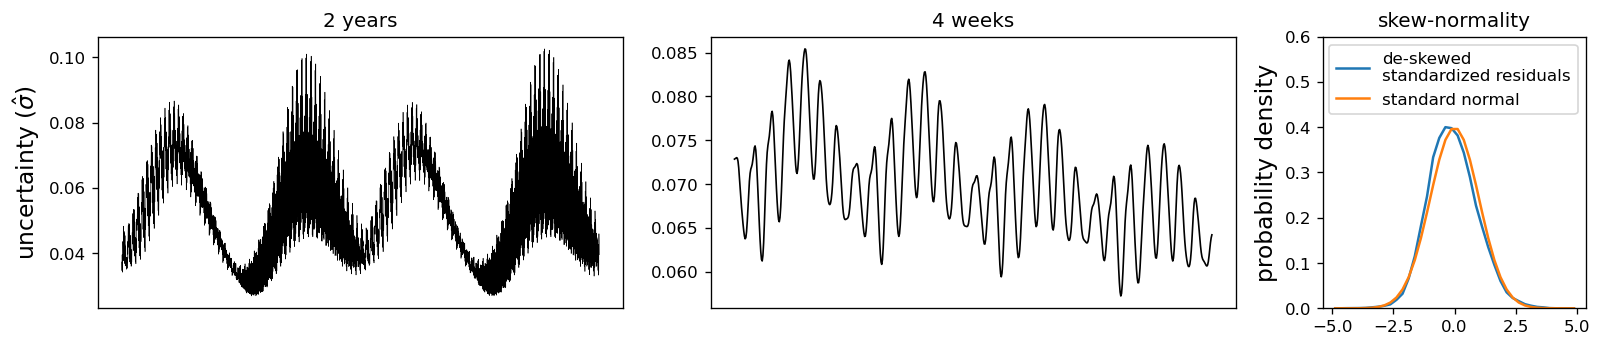

In [677]:
%matplotlib inline
from matplotlib import gridspec
std_hat = skewnorm.std(alpha_hat, loc=mu_hat, scale=sigma_hat)
fig = plt.figure(dpi=120, figsize=(16, 3))
spec = gridspec.GridSpec(ncols=3, nrows=1,
                         width_ratios=[2, 2, 1], height_ratios=[1])
ax0 = fig.add_subplot(spec[0])
plt.title("2 years")
plt.plot(std_hat[:8760 * 2], linewidth=0.35, color="k")
plt.ylabel("uncertainty ($\hat \sigma$)", fontsize=14)
# plt.xlabel("time (hours)")
plt.tick_params(labelbottom=False, bottom=False)
ax0 = fig.add_subplot(spec[1])
plt.title("4 weeks")
st = (52 + 31) * 24
plt.plot(np.arange(st, st + 4 * 168), std_hat[st:st + 4 * 168], linewidth=1, color="k")
plt.tick_params(labelbottom=False, bottom=False)
# plt.xlabel("time (hours)")
ax0 = fig.add_subplot(spec[2])
plt.plot(z_axis, z_hist, label="de-skewed\nstandardized residuals")
plt.plot(z_axis, norm.pdf(z_axis), label="standard normal")
plt.title("skew-normality")
plt.ylabel("probability density", fontsize=14)
plt.ylim([0, 0.6])
plt.legend()

# NASA GEOS-CF atmospheric chemistry comparison
## To replicate test:
Create an empty (containing only "{}") json file at the path `.\\atmo_chem\\NASAcomparison.json`. Run the command 

`jupyter nbconvert --to notebook --execute --inplace --allow-errors atmo_chem.ipynb`

in terminal 50 times (in a loop, for example). This will populate `.\\atmo_chem\\NASAcomparison.json` with the results for each of the 50 stations. This should take a few hours. These data are visualized in the following cells.

Make sure the data is located at `.\\atmo_chem\\stations\\` and follows the naming convention: observed data files start with "obs_" and NASA model forecasts start with "model_forecast_".

For additional figures on the calibration of the NO2, O3, and PM25 forecasts of a random selected station, see `atmo_chem_calibration.ipynb`.

In [5]:
def pinball_loss(data, quant_preds, quantiles):
    assert(len(data) == len(quant_preds))
    loss = 0
    for t in range(len(data)):
        for i in range(len(quantiles)):
            q = quantiles[i]
            quant_pred = quant_preds[t][i]
            if quant_pred > data[t]:
                loss += (quant_pred - data[t]) * (1 - q)
            else:
                loss += (data[t] - quant_pred) * q
    return loss / (len(data) * len(quantiles))

def nmb(data, pred):
    """Normalized mean bias"""
    assert(len(data) == len(pred))
    return np.mean(pred - data) / np.mean(data)

def nrmse(data, pred):
    """Normalized root mean square error"""
    assert(len(data) == len(pred))
    sorted_data = sorted(data)
    o05 = sorted_data[int(len(data) * 0.05)]
    o95 = sorted_data[int(len(data) * 0.95)]
    return np.sqrt(np.mean((data - pred)**2)) / (o95 - o05)

from scipy.stats import pearsonr
def correlation(data, pred):
    """Pearson correlation"""
    assert(len(data) == len(pred))
    return pearsonr(data, pred)[0]    

In [6]:
import json
with open(".\\atmo_chem\\NASAcomparison.json") as f:
    NASAcomparison = json.loads(f.read())

### Pinball Loss

In [7]:
bad_obss = ['EEA_IE_IE.IE001DP','EEA_IS_IS0053A','Station0000468','Station0000734','Station0000773','Station0000805','Station0000899','Station0001880','Station0002146','Station0002646','Station0002787','Station0003746','Station0004847','Station0004996','Station0005449', 'Station0005477']  # for these stations, we omit comparisons because observations do not start until late 2018/2019

In [32]:
pinball = pd.DataFrame({"koopman": {"NO2": [], "O3": [], "PM25": []}, "NASA": {"NO2": [], "O3": [], "PM25": []}})
nmb = pd.DataFrame({"koopman": {"NO2": [], "O3": [], "PM25": []}, "NASA": {"NO2": [], "O3": [], "PM25": []}})
nrmse = pd.DataFrame({"koopman": {"NO2": [], "O3": [], "PM25": []}, "NASA": {"NO2": [], "O3": [], "PM25": []}})
correlation = pd.DataFrame({"koopman": {"NO2": [], "O3": [], "PM25": []}, "NASA": {"NO2": [], "O3": [], "PM25": []}})
pinball_means = pd.DataFrame({"koopman": {"NO2": [], "O3": [], "PM25": []}, "NASA": {"NO2": [], "O3": [], "PM25": []}})
chem_names = ["NO$_2$", "O$_3$", "PM$_{2.5}$"]

for station in NASAcomparison:
    """Comparisons on stations 478 and 621 are excluded because there were no observations from the last 9 months of the training year."""
    if station not in ["Station0000478", "Station0000621"] + bad_obss:
        for chemical in ["NO2", "O3", "PM25"]:
            if NASAcomparison[station][chemical]["koopman"] != {}: # make sure data was there
                if np.isfinite(NASAcomparison[station][chemical]["koopman"]["pinball"]):
                    pinball["koopman"][chemical].append(NASAcomparison[station][chemical]["koopman"]["pinball"])
                    pinball["NASA"][chemical].append(NASAcomparison[station][chemical]["NASA"]["pinball"])
                    nmb["koopman"][chemical].append(NASAcomparison[station][chemical]["koopman"]["nmb"])
                    nmb["NASA"][chemical].append(NASAcomparison[station][chemical]["NASA"]["nmb"])
                    nrmse["koopman"][chemical].append(NASAcomparison[station][chemical]["koopman"]["nrmse"])
                    nrmse["NASA"][chemical].append(NASAcomparison[station][chemical]["NASA"]["nrmse"])
                    correlation["koopman"][chemical].append(NASAcomparison[station][chemical]["koopman"]["correlation"])
                    correlation["NASA"][chemical].append(NASAcomparison[station][chemical]["NASA"]["correlation"])
                else:
                    print(station + " " + chemical + " was NaN")


In [17]:
[len(p) for p in pinball.loc["PM25"]]

[12, 12]

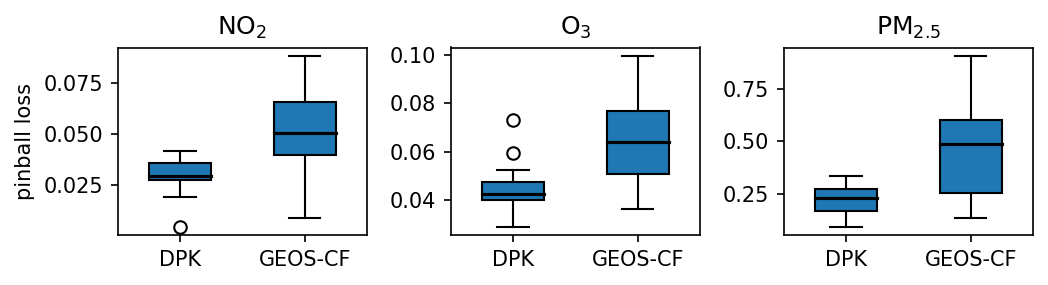

In [36]:
plt.subplots(figsize=(7, 2), dpi=150)
for i, chem in enumerate(pinball.index[::-1]):
    plt.subplot(1, 3, 3 - i)
    for col in pinball.columns:
        p = np.array(pinball[col][chem])
        pinball[col][chem] = p
        pinball_means[col][chem] = np.mean(p)
    plt.boxplot(pinball.loc[chem], widths=[0.5, 0.5], showfliers=True, patch_artist=True, labels=["DPK", "GEOS-CF"], medianprops={"linewidth":1.5, "color":'k'})
    plt.title(chem_names[2 - i])
plt.ylabel("pinball loss")
plt.tight_layout()

In [34]:
pinball_means

,koopman,NASA
NO2,0.029688,0.050888
O3,0.042549,0.063977
PM25,0.232703,0.488661


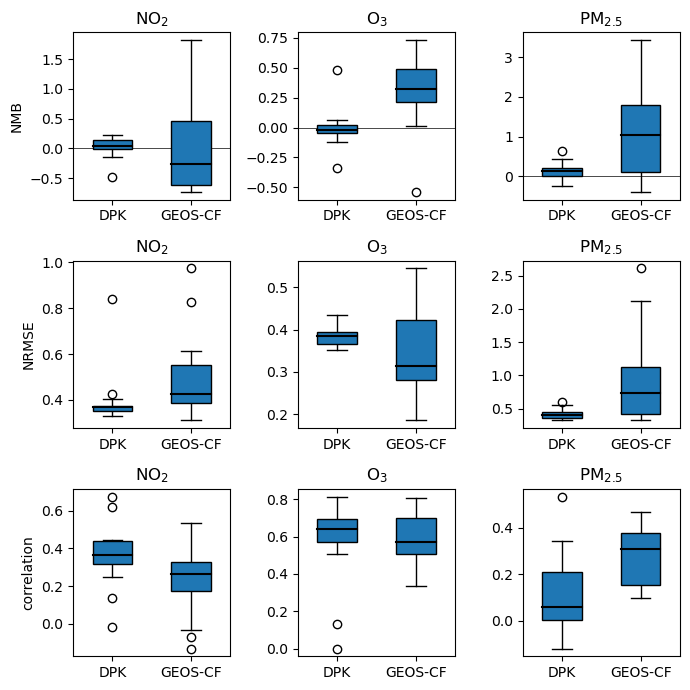

In [19]:
plt.subplots(figsize=(7, 7), dpi=100)
for i, chem in enumerate(nmb.index[::-1]):
    plt.subplot(3, 3, 3 - i)
    for col in nmb.columns:
        p = np.array(nmb[col][chem])
        nmb[col][chem] = p
    plt.boxplot(nmb.loc[chem], widths=[0.5, 0.5], showfliers=True, patch_artist=True, labels=["DPK", "GEOS-CF"], medianprops={"linewidth":1.5, "color":'k'})
    plt.title(chem_names[2 - i])
    plt.axhline(0, color="k", linewidth=0.5)
plt.ylabel("NMB")
plt.tight_layout()

for i, chem in enumerate(nrmse.index[::-1]):
    plt.subplot(3, 3, 3 - i + 3)
    for col in nrmse.columns:
        p = np.array(nrmse[col][chem])
        nrmse[col][chem] = p
    plt.boxplot(nrmse.loc[chem], widths=[0.5, 0.5], showfliers=True, patch_artist=True, labels=["DPK", "GEOS-CF"], medianprops={"linewidth":1.5, "color":'k'})
    plt.title(chem_names[2 - i])
plt.ylabel("NRMSE")
plt.tight_layout()

for i, chem in enumerate(correlation.index[::-1]):
    plt.subplot(3, 3, 3 - i + 6)
    for col in correlation.columns:
        p = np.array(correlation[col][chem])
        correlation[col][chem] = p
    plt.boxplot(correlation.loc[chem], widths=[0.5, 0.5], showfliers=True, patch_artist=True, labels=["DPK", "GEOS-CF"], medianprops={"linewidth":1.5, "color":'k'})
    plt.title(chem_names[2 - i])
plt.ylabel("correlation")
plt.tight_layout()

# Synthetic experiments
To replicate the experiment where we **recover the time-varying parameters** of a toy dataset, run `synthetic_tests.ipynb`.

To replicate the statistical description of the **Duffing oscillator**, run `.\\duffing\\from_fourier_to_koopman\\duffing.py`.

# Mouse cortical function
This experiment requires the `allensdk` library (available through `pip`), which downloads and processes the data from the Allen Brain Observatory. Run the `visual_coding.ipynb` notebook to replicate these experiments. Be careful to update the directory where you would like to download the data to ("`data_directory`").

## Normal logcdf approximation

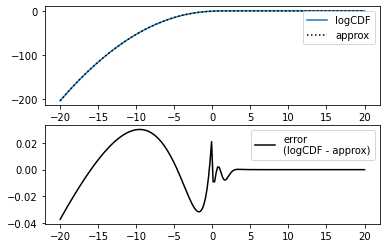

In [707]:
from scipy.stats import norm
import torch

z = torch.linspace(-20, 20, 200)

#  https://stats.stackexchange.com/questions/106003/approximation-of-logarithm-of-standard-normal-cdf-for-x0/107548#107548?newreg=5e5f6365aa7046aba1c447e8ae263fec
approx = torch.where(z < -0.1, -0.5 * z ** 2 - 4.8 + 2509 * (z - 13) / ((z - 40) ** 2 * (z - 5)),
                            -torch.exp(-z * 2) / 2 - torch.exp(-(z - 0.2) ** 2) * 0.2)

lp = norm.logcdf(z)
plt.figure()
plt.subplot(211)
plt.plot(z, lp, label="logCDF")
plt.plot(z, ans, ":k", label="approx")
plt.legend()
plt.subplot(212)
plt.plot(z, lp - approx.numpy(), "k", label="error\n(logCDF - approx)")
plt.legend()